In [1]:
import spacy
from tqdm.notebook import tqdm
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from tqdm.notebook import tqdm

In [3]:
import json

In [4]:
plt.rcParams["figure.figsize"] = (16,16)
plt.style.use('ggplot')

In [5]:
nlp_uk = spacy.load("/home/yevhen/prj/spacy_vectors")    

In [6]:
import stanza
from spacy_stanza import StanzaLanguage

snlp = stanza.Pipeline(lang="uk")
nlp = StanzaLanguage(snlp)

2020-05-27 00:56:36 INFO: Loading these models for language: uk (Ukrainian):
| Processor | Package |
-----------------------
| tokenize  | iu      |
| mwt       | iu      |
| pos       | iu      |
| lemma     | iu      |
| depparse  | iu      |

2020-05-27 00:56:36 INFO: Use device: cpu
2020-05-27 00:56:36 INFO: Loading: tokenize
2020-05-27 00:56:36 INFO: Loading: mwt
2020-05-27 00:56:36 INFO: Loading: pos
2020-05-27 00:56:37 INFO: Loading: lemma
2020-05-27 00:56:37 INFO: Loading: depparse
2020-05-27 00:56:38 INFO: Done loading processors!


In [7]:
import numpy as np
import re
import gzip
import json
import glob
import pandas as pd

Збираю дані. Буду працювати з повним датасетом, тому спочатку в мене буде 980 категорій. Але в мене є план

In [8]:
path = '/home/yevhen/prj/1551.gov.ua/raw/' # use your path
all_files = glob.glob(path + "/*/*.json.gz")

ds = []

for jsonfilename in all_files:
    with gzip.GzipFile(jsonfilename, 'r') as fin:    # 4. gzip
        json_bytes = fin.read() 
        json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
        data = json.loads(json_str)
        ds += data

df = pd.DataFrame(ds)

In [9]:
data

[{'StatusTitle': 'На доопрацюванні виконавцем',
  'CallZCdate': '2013-08-15 00:00:00',
  'CallZReply': '',
  'CallZText': 'Горячая вода отсутствует уже три недели,  никакого объявления о том, что воду отключат  и сроков не было, спустя две недели, после того как отключили (повторюсь, без предупреждения) повесили объявление что отсутствие воды будет продлено до 25.07.2013! Сегодня звонила в ЖЭК(4111674), диспетчер не отвечая на заданный мною вопрос просто диктует мне следующий номер телефона : 4118875, где просто постоянно занято! Когда закончится это безобразие?',
  'CallZManager': 'ПАТ ”Київенерго” - ТРМ [Фоменко Олександр Валерійович]',
  'CallZType': 'Відсутність ГВП',
  'CallDate': '2013-07-31 14:38:43',
  'CallCode': 'Я-3313',
  'FbId': '13510',
  'Enabled': '1',
  'PublicAgree': '1',
  'CallZStatusId': '3',
  'CallId': '2506731',
  'SyncTime': '2014-01-18 15:57:20',
  'PX': '50.517114',
  'PY': '30.514937',
  'showStatus': '',
  'files': '',
  'feedfiles': '',
  'reply': []}]

In [10]:
df.head()

,StatusTitle,CallZCdate,CallZReply,CallZText,CallZManager,CallZType,CallDate,CallCode,FbId,Enabled,PublicAgree,CallZStatusId,CallId,SyncTime,PX,PY,showStatus,files,feedfiles,reply
0,Роз`яснено по суті порушеного питання,2015-08-06 00:00:00,,ПРОХАННЯ ВІДНОВИТИ ОСВІТЛЕННЯ ПРИ ВХОДІ ТА В П...,ЖЕД № 9 [Сагайдак Ілля Вадимович],Відсутність освітлення у під’їзді за відсутнос...,2015-07-22 12:34:02,О-5169,160049,0,1,9,3244489,2015-08-17 12:00:02,50.480517,30.395284,,,,[]
1,Виконано,2013-12-04 00:00:00,,Не работает освещение на 10м этаже на лестничн...,ЖЕК - 306 [Прокопенко Станіслав Миколайович],Освітлення в приміщенні й при вході в нього,2013-11-19 11:41:15,О-8762,34129,1,1,5,2650529,2014-01-18 14:58:15,50.512099,30.610758,,,,[]
2,Виконано,2014-10-24 00:00:00,,Зламаний ліфт.\r\n\r\nВітаю!\r\n\r\nНа днях хо...,ЖЕД № 204 [Сінцов Геннадій Львович ],Не працює пасажирський ліфт,2014-10-21 15:57:37,О-5550,81879,1,1,5,2912956,2014-11-22 10:48:46,50.409781,30.635749,,,,[]
3,В роботі,2015-07-21 00:00:00,,Здравствуйте!!! Проблема с гарячей водой - ско...,ПАТ ”Київенерго” - ЖТЕ [Фоменко Олександр Вале...,Відсутність ГВП,2015-07-06 17:34:17,О-4668,154955,1,1,1,3223061,2015-07-09 11:16:03,50.454536,30.384437,,,,[]
4,Чекає на перевіку контр.відділом,2013-10-23 00:00:00,,По поводу обращения О-6074 - ответ на него дан...,ЖЕК - 306 [Прокопенко Станіслав Миколайович],Перерахунок та нарахування плати за інші види ...,2013-10-08 11:25:30,О-7194,24673,0,1,22,2590014,2014-01-18 15:25:24,50.512099,30.610758,,,,[]


In [11]:
df.shape

(127329, 20)

In [12]:
df = df.rename({'CallZType':'type', 'CallZText':'text', 'CallZManager':'manager', 'CallCode':'code'}, axis=1)

Бачимо аж 920 категорій, порахую ще квантилі.

In [13]:
df['type'].value_counts().describe()

count      920.000000
mean       138.401087
std        614.729594
min          1.000000
25%          3.000000
50%         13.000000
75%         69.000000
max      13273.000000
Name: type, dtype: float64

Половина категорій має 13 і менше прикладів, до того ж категорії дуже схожі. Тому я вирішив вдатися до кластеризації. Були різні поневіряння та спроби, але зупинисвя на такому підході:
1. Перевести назви категорій у вектори. Застосовую лематизацію та викидаю стоп слова, а далі просто сумую вектори.
2. Застосувати відразу t-SNE, щоб побачити перспективи подальшої кластеризації.
3. Далі було вирішено робити кластеризації оцих двомірних даних. Можливо, можна було б кластеризувати одразу 300-мірні дані, але там потрібно було якось по-іншому тюнити алгоритм, щоб досягти кращого варіанту.
4. Далі потрібен алгоритм кластеризації. Спочатку в голову приходить k-means, але в цього є проблема в тому, що треба вибирати кількість кластерів. Пробував, але метод ліктя щось пристойного не видавав. Далі обрав DBSCAN. В ньому гарне те, що він виділяє точки, що є "шумом" і які не можна віднести до якогось кластеру, то він і не намагається. Це дозволяє нам або виділити окремий клас "інше", або намагатись класифікувати всі ці класи окремо. 

In [14]:
def calc_category_vector(sent):
    sent_vector = np.zeros(300)
    doc = nlp(sent)
    word_counter = 0
    for word in doc:
        if not word.is_stop:
            word_vec = nlp_uk(word.lemma_)[0].vector
            sent_vector += word_vec
            word_counter += 1
    sent_vector /= word_counter
    return sent_vector

In [15]:
type_to_vector_mapping = {}
unique_cats = df['type'].unique()

for cat in tqdm(unique_cats):
    type_to_vector_mapping[cat] = calc_category_vector(cat)

In [16]:
all_cat_vectors = []
for cat, vector in type_to_vector_mapping.items():
    all_cat_vectors.append(vector)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df2['sent_vector_tfidf'], df2['type'], random_state=42, test_size=0.3)

NameError: name 'train_test_split' is not defined

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
tfidf = TfidfVectorizer()
tfidf.fit(df['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [104]:
word_idfs = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [419]:
def calc_vector_with_tfidf(sent):
    sent_vector = np.zeros(300)
    words = sent.split(' ')
    for word in words:
        word_vec = nlp_uk(word)[0].vector * word_idfs.get(word, 1)
        sent_vector += word_vec
    return sent_vector

Візуалізація векторів категорій у двомірному просторі

In [17]:
# That's an impressive list of imports.
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)

# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [18]:
X = np.array(all_cat_vectors)

In [19]:
X_proj = TSNE(random_state=RS, metric='cosine', perplexity=10).fit_transform(X)

In [20]:
def scatter(x):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(16, 16))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

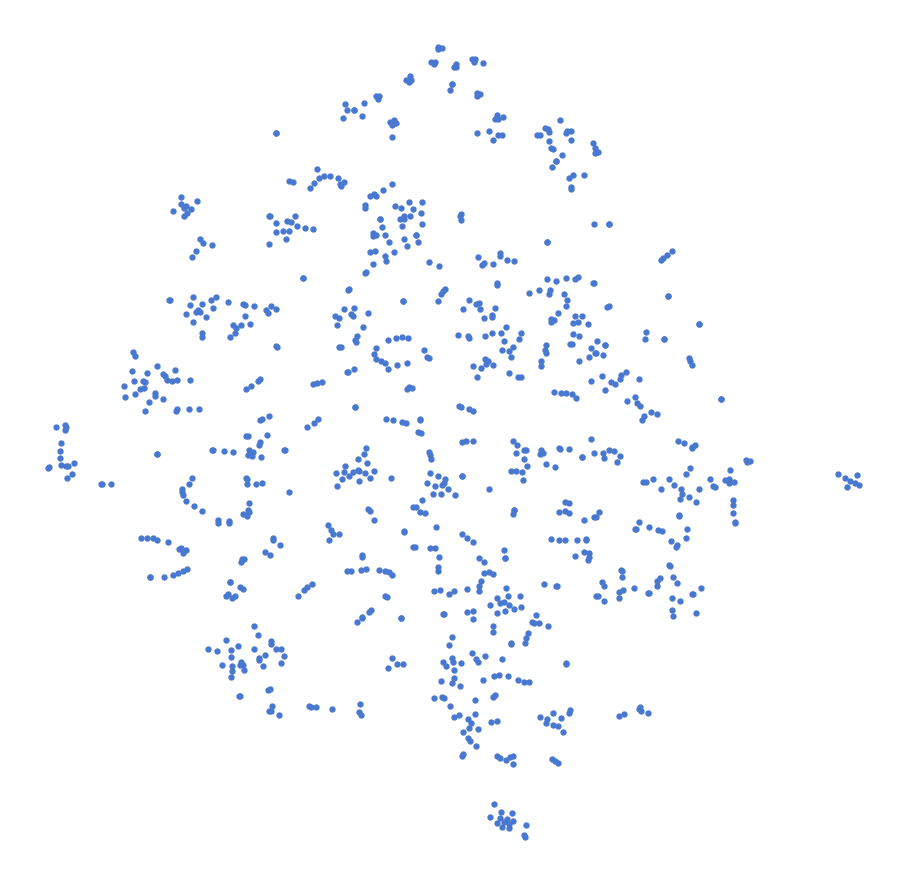

In [21]:
scatter(X_proj);

Бачимо що відгуки якось кучкуються, тому подальша кластеризація має перспективи. Потрібно якось вибирати гіперпараметри для кластеризації. Тут ідея буде така: найбільше елементів має бути у "класі" шуму, або не віднесеним до якогось кластеру. Якщо буде якийсь мегакластер, то є ризик, що до нього ввійде все підряд. Тому застосовую цю "евристику", а також дивлюсь очима, щоб категорії були більш менш схожі за сенсом.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Треную остаточну кластеризацію та візуалізую. Бачимо непоганий результат

In [23]:
db = DBSCAN(eps=3, min_samples=4)
db.fit(X_proj)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [24]:
def plot_dbscan(X, labels):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    f = plt.figure(figsize=(16, 16))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

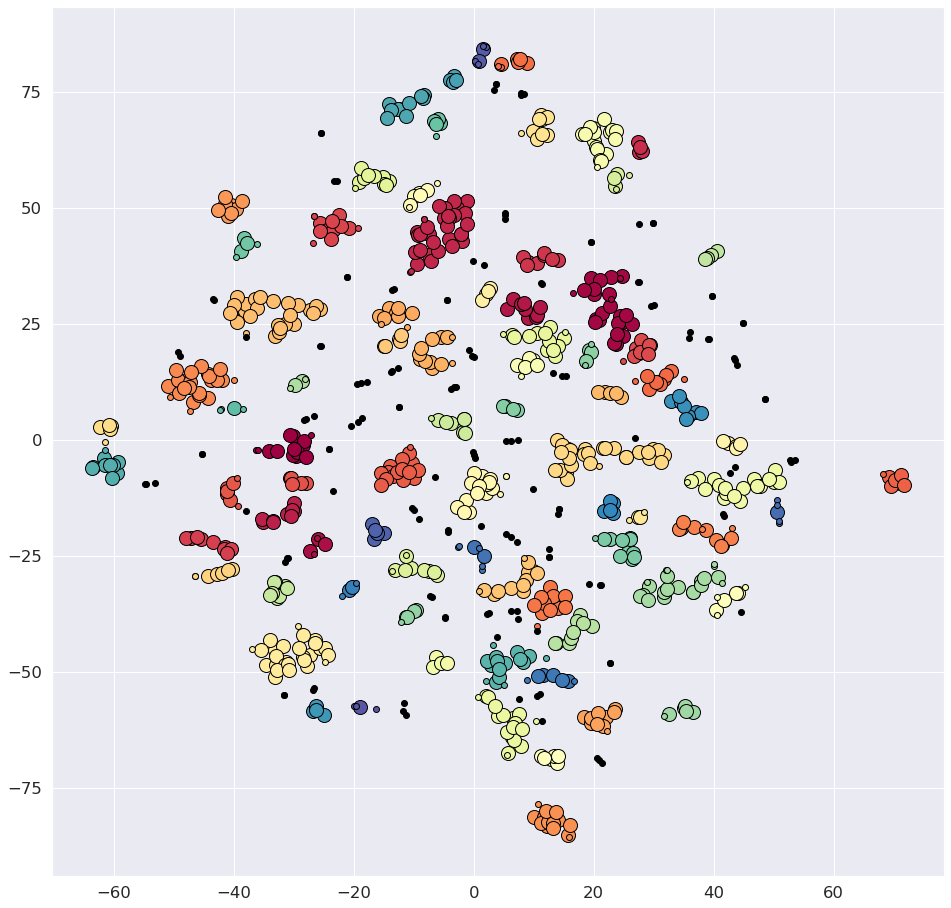

In [25]:
plot_dbscan(X_proj, labels);

In [26]:
types = []
for i, (cat,vector) in enumerate(type_to_vector_mapping.items()):
    types.append({'type':cat, 'vector':vector, 'cluster_label':labels[i]})

In [27]:
types_df = pd.DataFrame(types)

In [28]:
types_df

,type,vector,cluster_label
0,Відсутність освітлення у під’їзді за відсутнос...,"[-0.34522328206471037, -0.8050660054598536, -0...",0
1,Освітлення в приміщенні й при вході в нього,"[-0.49482465783754986, 1.6901630051822092, 1.3...",1
2,Не працює пасажирський ліфт,"[-0.5957973400751749, 1.4468623399734497, 0.28...",-1
3,Відсутність ГВП,"[0.2021704912185669, -1.5243464708328247, -0.7...",0
4,Перерахунок та нарахування плати за інші види ...,"[-1.1218151273205876, 0.17278912849724293, -0....",2
...,...,...,...
915,Загублене питання #227,"[-0.6030019819736481, -0.28079849667847157, 0....",34
916,Захист прав споживачів у сфері торгівлі продов...,"[-0.44747742425118175, -0.08048070002613324, 0...",30
917,Незадовільна робота районних управлінь соціаль...,"[-1.2684968571577753, 0.7657221470560346, -0.8...",36
918,Облаштування спеціалізованих місць для проведе...,"[-0.6810597138745444, 0.9227508657744953, 0.62...",-1


Некласифікованими виявилось 148 категорій з 980, і якщо їх вважати окремим кластером, то всього їх буде 79. Здається, непоганий результат. Також, подивлюсь на те, як виглядають самі категорії

In [29]:
types_df['cluster_label'].value_counts()[0:10]

-1     148
 5      33
 30     28
 26     28
 34     27
 1      26
 19     23
 55     21
 44     20
 37     18
Name: cluster_label, dtype: int64

In [30]:
len(types_df['cluster_label'].unique())

79

In [31]:
for t in types_df[types_df['cluster_label']==5].loc[:,'type']:
    print(t)

Контроль за станом рекламних засобів
Технічний стан проїжджих частин вулиць та тротуарів
Прибирання та санітарний стан територій
Незадовільний стан опори для освітлення
Інші технічні недоліки стану ліфту
Облаштування та технічний стан бюветного комплексу
Незадовільний стан кнопок виклику/наказу ліфту
Санітарний стан проїжджих частин
Обслуговування та технічний стан радіаторів
Укладання та технічний стан бордюрного каменю
Обслуговування та технічний стан каналізаційних колодязів
Аварійний стан балконів
Незадовільний санітарний стан автобусних зупинок
Незадовільний стан прилеглої до МАФ території (не прибрано, тощо)
Аварійний, травмонебезпечний стан утримання об’єктів благоустрою
Санітарний стан об’єктів культурної спадщини
Незадовільний технічний стан автобусів
Незадовільний технічний стан кабіни ліфту
Стан зливосточних систем проїжджих частин та тротуарів
Незадовільний санітарний стан ліфту
Незадовільний санітарний стан тролейбусних зупинок
Незадовільний технічний стан тролейбусів
Благ

В принципі, категорії було віднесено до одного кластеру через наявність спільних слів. Наприклад, тут це "стан". Або в наступному прикладі "виплати". Стан доволі різних речей, але збирати окремо всі звернення про "стан" чогось, я вважаю нормальною ідеею. Так само я і казав би стейкхолдеру, що треба так зробити, але тут його нема). Але з алгоритмом кластеризації є нюанс. ДБскан так працює, що для кожної точки шукає, чи є інші точки в певному радіусі. Якщо є, то вона додається до цього кластеру і далі відбувається перевірка для неї. Це призводить до того, що можуть утворитися дуже витягнуті кластери складної форми. Якщо говорити про текст, то точка на одному кінці кластеру може сильно відрізнятись від точки на іншому кінці і може не мати тих самих ключових слів. Це можна побачити нижче, у кластері номер 30. Від усіляких тарифів приходимо до продажу спиртних напоїв та наркотичних речовин, а звідти до "куріння у заборонених місцях". А просто куріння вже не дуже має відношення до тарифів. Цей недолік ми зараз не будемо намагатись прибрати, най буде)

In [32]:
for t in types_df[types_df['cluster_label']==71].loc[:,'type'][:15]:
    print(t)

Виплати до свят
Заборгованість з виплати пенсій
Про впровадження абонентських книжок АК ”Київенерго”,на оплату за електроенергію
Надання допомоги на погашення заборгованості по оплаті за ЖКП


In [33]:
for t in types_df[types_df['cluster_label']==30].loc[:,'type']:
    print(t)

Тарифи на послуги з паркування
Куріння тютюнових виробів у заборонених місцях
Вантажний транспорт
Безкоштовний проїзд окремих категорій громадян
Розмір тарифів на проїзд у міському громадському транспорті (МГТ)
Виготовлення, продаж та вживання наркотичних речовин в житлових будинках
Продаж та вживання наркотичних речовин в громадських місцях
Право безкоштовного проїзду всіма видами пасажирського міського транспорту
Роз’яснення, які громадяни можуть безкоштовно користуватися маршрутним таксі
Відмова в безкоштовному перевезенні пасажирів пільгових категорій марш. таксі
Безоплатний проїзд по «Картці киянина» в Київському  метрополітені
Продаж спиртних/слабоалкогольних напоїв та тютюнових виробів особам молодше 18р.
Розмір тарифів на проїзд у маршрутних таксі
Розпивання пива, алкогольних, слабоалкогольних напоїв у заборонених законом місц
Не видача пасажирам квитків (марш. таксі)
Тарифи на послуги в громадських туалетах
Тарифи (ціни) на лікарські засоби у аптеках КП ”Фармація”
Організація 

Візуалізую кластери, "підписавши" їх словом, яке найчастіше вживається в них. 

In [34]:
def extract_non_stop_lemmas(text):
    doc = nlp(text)
    return " ".join([w.lemma_ for w in doc if not w.is_stop and not w.is_punct])

types_df['lemmatized'] = types_df['type'].apply(extract_non_stop_lemmas)

types_to_cluster_dict = dict(zip(types_df['type'], types_df['cluster_label']))

cluster_to_most_common_word = {}
for cluster in types_df['cluster_label'].unique():
    categories = types_df[types_df['cluster_label']==cluster].loc[:,'lemmatized']

    cluster_to_most_common_word[cluster] = Counter(" ".join(categories).split()).most_common(1)[0][0]
    
types_df['most_common'] = types_df['cluster_label'].map(cluster_to_most_common_word)

In [35]:
df['cluster_label'] = df['type'].map(types_to_cluster_dict)

In [36]:
def plot_dbscan_with_words(X, labels, cluster_to_most_common_word):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    words_for_colors = [cluster_to_most_common_word[l] for l in unique_labels]
    f = plt.figure(figsize=(16, 16))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
        
    # We add the labels for each digit.

    for i, label in enumerate(labels):
        # Position of each label.
        xtext, ytext = np.median(X_proj[labels == label], axis=0)
        txt = plt.text(xtext, ytext, cluster_to_most_common_word[label], fontsize=16)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=3, foreground="w"),
            PathEffects.Normal()])

In [37]:
cluster_to_most_common_word

{0: 'відсутність',
 1: 'ремонт',
 -1: 'робота',
 2: 'житловий',
 3: 'майданчик',
 4: 'перерахунок',
 5: 'стан',
 6: 'порушення',
 7: 'дерево',
 8: 'відсутній',
 9: 'станція',
 10: 'ремонт',
 11: 'відсутність',
 12: 'встановлення',
 13: 'перевірка',
 14: 'перейменування',
 58: 'ремонт',
 15: 'обслуговування',
 16: 'зупинок',
 17: 'робота',
 18: 'навчальний',
 19: 'встановлення',
 20: 'подяка',
 21: 'сміття',
 22: 'пропозиція',
 23: 'прибирання',
 24: 'зона',
 56: 'кількість',
 50: 'місто',
 25: 'приватний',
 26: 'проведення',
 27: 'робота',
 73: 'ліквідація',
 28: 'паркування',
 29: 'тиск',
 30: 'тариф',
 31: 'торгівля',
 32: 'рух',
 33: 'відмова',
 34: 'питання',
 35: 'демонтаж',
 36: 'населення',
 37: 'право',
 38: 'стан',
 39: 'претензія',
 49: 'вимога',
 40: 'тварина',
 41: 'об’єкт',
 42: 'порушення',
 43: 'державний',
 46: 'будівництво',
 44: 'забезпечення',
 45: 'працівник',
 47: 'перехід',
 48: 'АТО',
 51: 'питання',
 52: 'залиття',
 53: 'робота',
 54: 'якість',
 55: 'допомога',


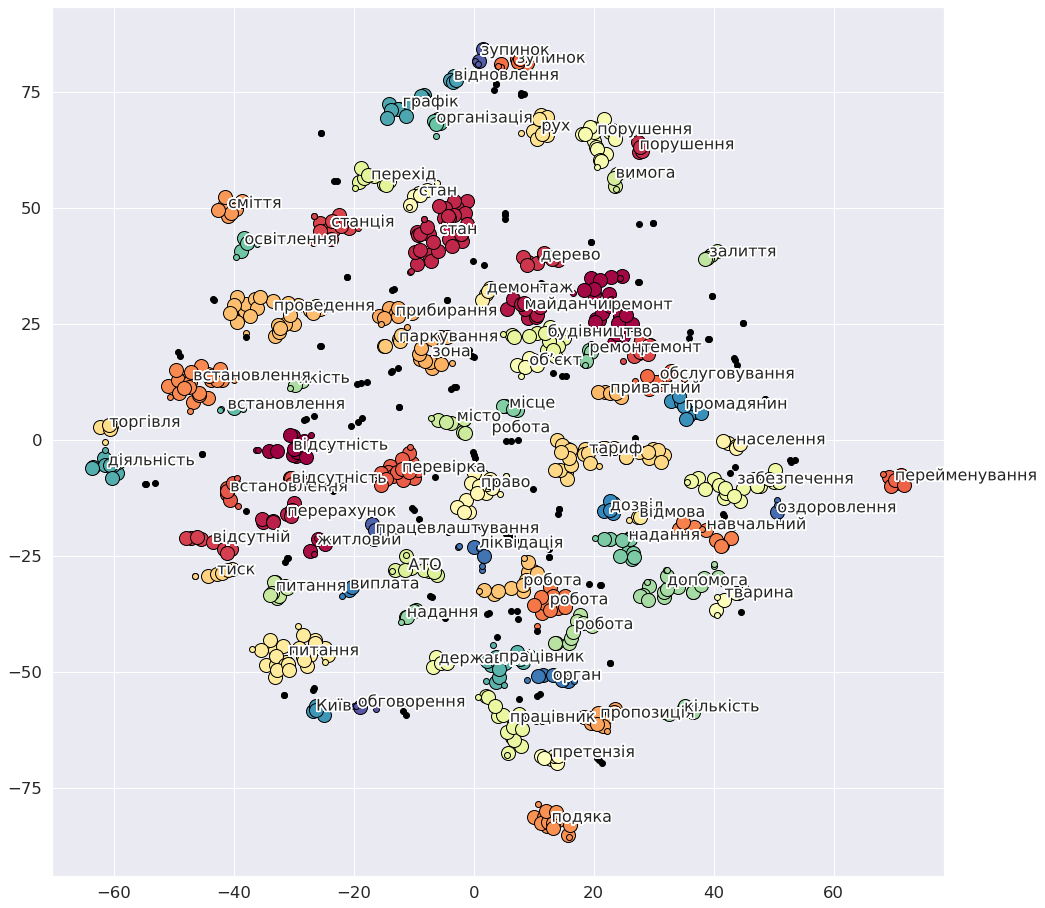

In [38]:
plot_dbscan_with_words(X_proj, labels, cluster_to_most_common_word);

Тож, будемо проводити класифікацію 79 класів

Модель зі Станци, яку я використовую, трохи довго обраховує все, тому надалі я працюватиму тільки з половиною датасету( 60К прикладів), яку я стратифікував по новим 79 класам.

In [39]:
df_sample = pd.read_csv('df_sample_60K.csv')

In [40]:
df_sample.head()

,Unnamed: 0,StatusTitle,CallZCdate,CallZReply,text,manager,type,CallDate,code,FbId,...,SyncTime,PX,PY,showStatus,files,feedfiles,reply,manager_company,cluster_label,cluster_label_plus_one
0,80018,Виконано,2014-11-03 00:00:00,NaN,Добрый день! Второй день нет электричества в д...,Філіал ”Кабельні мережі” [Фоменко Олександр Ва...,Відсутнє електропостачання,2014-10-29 17:01:12,П-18941,87032,...,2014-11-12 16:16:03,50.458631,30.474412,NaN,NaN,NaN,[],Філіал ”Кабельні мережі” [],8,9
1,6808,Чекає на перевіку контр.відділом,2015-10-21 00:00:00,NaN,Доброго дня! Після проведення повірки лічильни...,ЖЕК - 506 [Цибульщак Олександр Леонідович],Встановлення та експлуатація лічильників на во...,2015-10-06 22:33:59,В-12908,188876,...,2015-10-21 10:48:06,50.508490,30.486629,NaN,NaN,NaN,[],ЖЕК - 506 [],12,13
2,24957,На доопрацюванні виконавцем,2013-07-18 00:00:00,NaN,"Хмельницкого 26. На дороге, при въезде в первы...",КК ”Київавтодор” [Костюк Михайло Дмитрович],Стан зливосточних систем проїжджих частин та т...,2013-07-03 14:22:28,Б-12673,9900,...,2014-01-18 16:08:32,50.446122,30.513927,NaN,"[{'id': '2274', 'InOut': '0', 'file': '/feedba...",NaN,[],КК ”Київавтодор” [],5,6
3,18606,Потребує додаткового фінансування,2015-04-03 00:00:00,NaN,Мешканці будинку №5 по вул.О.Мільчакова зверта...,ЖРЕО - 405 [Горбунов Ярослав Володимирович],Проведення капітального ремонту у будинку (рек...,2015-03-19 20:13:18,Р-2169,120870,...,2015-04-02 10:48:03,50.456159,30.597481,NaN,NaN,NaN,[],ЖРЕО - 405 [],58,59
4,51686,Виконано,2015-07-20 00:00:00,NaN,За результатами скарги К-19878 була отримана в...,КП ”ЖЕО - 103” [в.о. Мельничук Андрій Анатолій...,Проведення дезинсекції,2015-06-17 23:59:23,К-22787,148979,...,2015-07-20 11:32:05,50.395628,30.502816,NaN,"[{'id': '81216', 'InOut': '0', 'file': '/feedb...","[{'id': '51964', 'file': '/feedback/fdocs/3200...",[],КП ”ЖЕО - 103” [],26,27


In [41]:
df_sample['cluster_label'].value_counts()

 0     8556
 1     7612
-1     6992
 5     4604
 11    3832
       ... 
 70      14
 77      10
 75       8
 74       7
 43       6
Name: cluster_label, Length: 79, dtype: int64

In [42]:
df_sample = df_sample.rename({'Unnamed: 0':'doc_index'}, axis=1)

In [128]:
def calc_base_sent_vector(sent):
    words = sent.split(' ')
    vector = np.zeros(300)
    for word in words:
        word_vec = nlp_uk(word)[0].vector
        vector += word_vec
    vector /= len(words)
    return vector

Зроблю базове рішення на KNN та простих векторах, що є нормованою сумою всіх слів 

In [58]:
vectors = []
for i, row in tqdm(df_sample.iterrows()):
    try:
        vector = calc_base_sent_vector(row['text'])
    except:
        vector = np.zeros(300)
    vectors.append(vector)

/home/yevhen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [59]:
df_sample['base_vector'] = vectors

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.preprocessing import LabelEncoder

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    df_sample['base_vector'], 
    df_sample['cluster_label'], 
    random_state=42, 
    test_size=0.3, 
    stratify=df_sample['cluster_label']
)

In [61]:
le = LabelEncoder().fit(y_train)

In [73]:
X_train_array = np.array(X_train.values.tolist())
X_test_array = np.array(X_test.values.tolist())

In [74]:
X_train_array[np.isnan(X_train_array)] = 0
X_test_array[np.isnan(X_test_array)] = 0

In [63]:
le.transform(y_train).shape

(42000,)

In [64]:
knn = KNeighborsClassifier(n_neighbors=10, metric='cosine')

In [71]:
knn.fit(X_train_array, le.transform(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [77]:
from sklearn.metrics import classification_report

print(classification_report(le.transform(y_test), knn.predict(X_test_array)))

              precision    recall  f1-score   support

           0       0.17      0.58      0.26      2098
           1       0.40      0.54      0.46      2567
           2       0.34      0.38      0.36      2284
           3       0.34      0.20      0.25       301
           4       0.27      0.20      0.23       346
           5       0.34      0.20      0.25       618
           6       0.31      0.21      0.25      1381
           7       0.00      0.00      0.00        34
           8       0.54      0.13      0.21       206
           9       0.19      0.04      0.07       393
          10       0.00      0.00      0.00        23
          11       0.09      0.01      0.02       292
          12       0.50      0.30      0.38      1150
          13       0.14      0.05      0.08       369
          14       0.35      0.32      0.34       905
          15       1.00      0.14      0.24        22
          16       0.18      0.02      0.04        89
          17       0.33    

/home/yevhen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


В мене погано розвинена якась інтуїція щодо класифікації на таку велику кількість класів, тому погано можу судити про величину метрики. Хіба що видно, що макро-евередж зовсім поганий і деякі класі зовсім ніяк не вдається класифікувати

Далі зроблю такі покращення: 
1. Сформую кращі вектори: викину стоп-слова та буду брати вектори лем слів. Також викину "слова", на які у Станци не було вектору. Це допоможе краще нормувати потім вектор, бо додажмо ми нулі, а потім ділимо на більшу кількість слів, ніж векторів було насправді. Леми у мене збережені окремо, тому просто буду їх читати з документів.
2. Спробую на нових векторах кілька кращих моделей

In [78]:
all_docs_path = '/home/yevhen/prj/data/1551_docs/df_sample_docs/'
all_doc_filenames = glob.glob(all_docs_path + "/*.csv")

In [80]:
docdf = pd.read_csv(all_doc_filenames[0])

In [81]:
docdf

,df_sample_index,word_text,lemma,dep,pos,head,is_stop,has_vector,vector,lang
0,37893,По,по,case,ADP,моему,True,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",uk
1,37893,моему,моема,obl,NOUN,пояснить,False,True,"[0.411993, 0.151376, 0.125322, 0.037789, -0.15...",uk
2,37893,обращению,обращений,amod,ADJ,моему,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",uk
3,37893,Ш,Ш.,nsubj,NOUN,прошу,False,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",uk
4,37893,-,-,punct,PUNCT,10793,False,True,"[-0.590913, -0.095895, 0.567351, -0.54921, -0....",uk
...,...,...,...,...,...,...,...,...,...,...
107,37893,надеюсь,надетися,root,VERB,надеюсь,False,True,"[0.321493, -0.072442, -0.023192, -0.253044, -0...",uk
108,37893,на,на,case,ADP,помощь,True,True,"[0.290973, -0.186162, 0.078442, -0.126311, -0....",uk
109,37893,Вашу,ваш,det,DET,помощь,True,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",uk
110,37893,помощь,помощь,obl,NOUN,надеюсь,False,True,"[-0.107337, 0.016432, -0.057322, -0.155261, -0...",uk


In [82]:
docdf['vector'] = docdf['vector'].apply(json.loads)

In [83]:
np.array(docdf['vector'].to_list()).shape

(112, 100)

In [84]:
def form_lemma_sentence(docdf):
    return ' '.join(
        docdf[
            (docdf['is_stop']==False)
            &(docdf['has_vector']==True)
            &(docdf['pos']!='PUNCT')
        ]['lemma'].values
    )

In [85]:
def form_stanza_vector(docdf):
    docdf['vector'] = docdf['vector'].apply(json.loads)
    good_words_df = docdf[
            (docdf['is_stop']==False)
            &(docdf['has_vector']==True)
            &(docdf['pos']!='PUNCT')
        ]
    vectors_array = np.array(good_words_df['vector'].to_list())
    return vectors_array.sum(axis=0) / vectors_array.shape[0]

In [ ]:
def calc_lemma_vector_from_doc(sent):
    sent_vector = np.zeros(300)
    doc = nlp(sent)
    word_counter = 0
    for word in doc:
        if not word.is_stop:
            word_vec = nlp_uk(word.lemma_)[0].vector
            sent_vector += word_vec
            word_counter += 1
    sent_vector /= word_counter
    return sent_vector

In [130]:
idx_to_vector = {}
idx_to_stanza_vector = {}
for filename in tqdm(all_doc_filenames):
    try:
        docdf = pd.read_csv(filename)
        index = docdf.loc[0, 'df_sample_index']
        
        lemma_sentence = form_lemma_sentence(docdf)
        lemma_vect = calc_base_sent_vector(lemma_sentence)
        idx_to_vector[index] = lemma_vect
        
        stanza_vector = form_stanza_vector(docdf)
        idx_to_stanza_vector[index] = stanza_vector
    except:
        continue

In [132]:
df_sample_idx = df_sample['doc_index']

for index in df_sample_idx:
    if isinstance(idx_to_vector.get(index, 0), int):
        idx_to_vector[index] = np.zeros(300)
        
    if isinstance(idx_to_stanza_vector.get(index, 0), int):
        idx_to_stanza_vector[index] = np.zeros(100)

In [133]:
df_sample['lemma_vector'] = df_sample['doc_index'].map(idx_to_vector)

In [134]:
df_sample['lemma_vector']

0        [-0.5543425785643714, -0.19277656716959818, 0....
1        [-0.9267011189367622, -0.39060395397245884, 0....
2        [-0.6663195093472799, 0.22702966630458832, 0.5...
3        [0.04434834009614484, -0.01807645321341938, 0....
4        [-0.5106998069106408, 0.41524720893083317, -0....
                               ...                        
59995    [-0.6384117047895085, 0.33355322073806415, 0.4...
59996    [-0.1806332354640795, -0.6349839788896067, -0....
59997    [-0.7031144380037274, 0.05842912658339455, 0.2...
59998    [-0.12247616296204236, -0.08441284714409938, 0...
59999    [0.0874009881168604, 0.6918376380205155, 0.643...
Name: lemma_vector, Length: 60000, dtype: object

In [135]:
df_sample['stanza_vector'] = df_sample['doc_index'].map(idx_to_stanza_vector)
df_sample['stanza_vector']

0        [0.17885299999999998, -0.013179857142857148, 0...
1        [0.133207875, -0.3366375416666667, 0.448900583...
2        [0.06847, -0.03131216666666667, 0.134024833333...
3        [0.10513675862068968, -0.12167886206896551, 0....
4        [0.17663277358490564, -0.2644499433962264, 0.3...
                               ...                        
59995    [0.22068504545454548, -0.2628586363636364, 0.2...
59996    [0.1307513518518519, 0.08302507407407406, 0.09...
59997    [0.07567354761904761, -0.2595131190476191, 0.4...
59998    [0.09862330769230768, -0.18974434615384614, 0....
59999    [0.3238580000000001, -0.1795155600000001, 0.44...
Name: stanza_vector, Length: 60000, dtype: object

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    df_sample['lemma_vector'], 
    df_sample['cluster_label'], 
    random_state=42, 
    test_size=0.3, 
    stratify=df_sample['cluster_label']
)

le = LabelEncoder().fit(y_train)
X_train_array = np.array(X_train.values.tolist())
le.transform(y_train).shape
knn = KNeighborsClassifier(n_neighbors=10, metric='cosine')
knn.fit(X_train_array, le.transform(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [137]:
print(classification_report(le.transform(y_test), knn.predict(np.array(X_test.values.tolist()))))

              precision    recall  f1-score   support

           0       0.26      0.45      0.33      2098
           1       0.41      0.70      0.52      2567
           2       0.37      0.52      0.43      2284
           3       0.34      0.39      0.36       301
           4       0.40      0.40      0.40       346
           5       0.40      0.32      0.36       618
           6       0.30      0.25      0.27      1381
           7       0.20      0.03      0.05        34
           8       0.59      0.28      0.38       206
           9       0.28      0.09      0.14       393
          10       0.00      0.00      0.00        23
          11       0.10      0.01      0.02       292
          12       0.59      0.46      0.51      1150
          13       0.27      0.19      0.22       369
          14       0.38      0.47      0.42       905
          15       1.00      0.27      0.43        22
          16       0.27      0.07      0.11        89
          17       0.26    

/home/yevhen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Метрики від нормалізованих векторів на лемах помітно виросли. Далі спробуємо бустінг на цих векторах

In [138]:
X_train, X_dev, y_train, y_dev = train_test_split(
    np.array(list(X_train)), 
    y_train, 
    random_state=42, 
    test_size=0.3, 
    stratify=y_train
)

In [140]:
import xgboost as xgb

def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=17, child=1, colsample=0.3):
    param = {}
    param['objective'] = 'multi:softmax'
    param['num_class'] = 79
    param['eta'] = 0.1
    param['max_depth'] = 3
    param['silent'] = 1
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = child
    param['subsample'] = 0.8
    param['colsample_bytree'] = colsample
    param['seed'] = seed_val
    num_rounds = 200
    
    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=15, verbose_eval=10)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest, ntree_limit = model.best_ntree_limit)
    
    return pred_test_y, model

In [141]:
pred_dev_y, model_valid = runXGB(
    X_train, 
    le.transform(y_train), 
    X_dev, 
    le.transform(y_dev)
)

[0]	train-mlogloss:4.00997	test-mlogloss:4.02737
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 15 rounds.
[10]	train-mlogloss:2.99106	test-mlogloss:3.10725
[20]	train-mlogloss:2.61534	test-mlogloss:2.807
[30]	train-mlogloss:2.38889	test-mlogloss:2.6472
[40]	train-mlogloss:2.22591	test-mlogloss:2.54528
[50]	train-mlogloss:2.09758	test-mlogloss:2.47592
[60]	train-mlogloss:1.99258	test-mlogloss:2.42459
[70]	train-mlogloss:1.9027	test-mlogloss:2.38556
[80]	train-mlogloss:1.82331	test-mlogloss:2.35429
[90]	train-mlogloss:1.75245	test-mlogloss:2.33
[100]	train-mlogloss:1.68794	test-mlogloss:2.30796
[110]	train-mlogloss:1.63028	test-mlogloss:2.2896
[120]	train-mlogloss:1.57715	test-mlogloss:2.27385
[130]	train-mlogloss:1.52817	test-mlogloss:2.25983
[140]	train-mlogloss:1.48192	test-mlogloss:2.24832
[150]	train-mlogloss:1.43857	test-mlogloss:2.23718
[160]	train-mlogloss:1.39844	test-mlogloss:2.22825
[

In [142]:
pred_dev_y

array([0., 0., 0., ..., 6., 1., 2.], dtype=float32)

In [143]:
print(
    classification_report(
        le.transform(y_test), 
        model_valid.predict(
            xgb.DMatrix(np.array(list(X_test))),
            ntree_limit = model_valid.best_ntree_limit
        )
    )
)

              precision    recall  f1-score   support

           0       0.27      0.50      0.35      2098
           1       0.47      0.69      0.56      2567
           2       0.37      0.62      0.46      2284
           3       0.42      0.42      0.42       301
           4       0.58      0.38      0.46       346
           5       0.52      0.37      0.43       618
           6       0.31      0.26      0.28      1381
           7       1.00      0.03      0.06        34
           8       0.66      0.41      0.50       206
           9       0.39      0.10      0.16       393
          10       0.67      0.09      0.15        23
          11       0.62      0.03      0.05       292
          12       0.61      0.58      0.59      1150
          13       0.49      0.20      0.29       369
          14       0.41      0.50      0.46       905
          15       1.00      0.27      0.43        22
          16       0.38      0.06      0.10        89
          17       0.60    

/home/yevhen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Бустинг також трохи покращив метрики, але я не дуже перебирав гіперпараметри. Про проблеми цього датасету вже казали багато, але найголовніша проблема, як мені здаєьться: відсутність чіткого "замовлення", яке б в свою чергу казало, які саме категорії потрібно виділяти, скільки кластерів класифікувати та на які метрики дивитись.